Erick Barron
Comp 541
Prof. Klotzman

DEFINE THE PROBLEM AND COLLECT DATA
-For my project I am choosing to find the best month to visit an amusment park or the santa monica pier and beach. I have chosen this problem as it is a good way to master the techniques and methods taught in class while making something that will help me learn both data mining and best vacation times. I have chosen to get my CSV file from CIMIS which stands for California Irrigation Management Information System. This is a website run by the California Department of Water Resources and provides data from their weather station located all around the state. The data given is perfect for the project as it gives all the relevant infor needed to personally determine the best time to vacation. It is also free to get data although you have to sign up to request the data in CSV format. It also lets you choose daily and monthly or even hourly data. you can also choose the units you file will show such as metric or engligh, the date range I believe you can request all the way back to the 1950's. You will then choose the weather stations you want data from for my project I chose the ones closest to the places I am making the data for Santa Monica (Beach/Pier), Santa Clarita (Six Flags), North Hollywood (Universal Studios), and Irvine (DisneyLand).

In [136]:
#COLLECT AND PREPARE DATA
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Load the dataset
CIMISDATA = pd.read_csv('CIMISData.csv')

#Convert relevant info to numeric types
numeric_columns = ['Avg Air Temp (F)', 'Avg Wind Speed (mph)', 'Avg Dew Point (F)', 'Total Precip (in)']
CIMISDATA[numeric_columns] = CIMISDATA[numeric_columns].apply(pd.to_numeric, errors='coerce')

#Drop if row has missing values
CIMISDATA.dropna(inplace=True)

# Split 'Month Year' into separate 'Month' and 'Year' columns
CIMISDATA[['Month', 'Year']] = CIMISDATA['Month Year'].str.split(expand=True)

#Define preferences (can be changed depending on person)
prefTemp = (70, 75) #In fahrenheight
prefWind = (0, 12) #In miles per hour
prefDew = (0, 55) #Just a range 
prefPrecipitation = (0, 5) #In inches


#Calculate scores for each month based on criteria 5 is best 0 is worse
def calculate_score(row):
    temp_score = 5 if prefTemp[0] <= row['Avg Air Temp (F)'] <= prefTemp[1] else 0
    wind_score = 5 if prefWind[0] <= row['Avg Wind Speed (mph)'] <= prefWind[1] else 0
    dew_score = 5 if prefDew[0] <= row['Avg Dew Point (F)'] <= prefDew[1] else 0
    precip_score = 5 if prefPrecipitation[0] <= row['Total Precip (in)'] <= prefPrecipitation[1] else 0
    return temp_score + wind_score + dew_score + precip_score

CIMISDATA['Score'] = CIMISDATA.apply(calculate_score, axis=1)

#Rank months based on scores
ranked_months = CIMISDATA.sort_values(by='Score', ascending=False)

#Filter and recommend top months based on scores
top_months = ranked_months.head(12)['Month Year']

#Create a new DataFrame with month scores as features for clustering
monthFeatures = ['Score']
monthsF = CIMISDATA[monthFeatures]

#Normalize the data this time we use Standard vs MinMaCIMISFeatures
scaler = StandardScaler()
monthsNormalized = scaler.fit_transform(monthsF)

#Inspect, summarize, and check for missing values
print(CIMISDATA.head())
print(CIMISDATA.info())
CIMISDATA.describe()
CIMISDATA.isnull().sum()



   Stn Id Stn Name         CIMIS Region Month Year  Total ETo (in) qc  \
0      75   Irvine  South Coast Valleys   May 2010            5.86  K   
1      75   Irvine  South Coast Valleys   Jun 2010            5.50  K   
2      75   Irvine  South Coast Valleys   Jul 2010            5.72  K   
3      75   Irvine  South Coast Valleys   Aug 2010            6.33      
4      75   Irvine  South Coast Valleys   Sep 2010            4.86  K   

   Total Precip (in) qc.1  Avg Sol Rad (Ly/day) qc.2  ...  qc.9  \
0               0.02                      605.0       ...         
1               0.00    K                 584.0    K  ...         
2               0.05                      562.0       ...         
3               0.00                      594.0       ...     K   
4               0.00                      480.0       ...     K   

  Avg Dew Point (F)  qc.10 Avg Wind Speed (mph)  qc.11 Avg Soil Temp (F)  \
0              49.0                         3.8      K              74.0   
1     

Stn Id                              0
Stn Name                            0
CIMIS Region                        0
Month Year                          0
Total ETo (in)                      0
qc                                  0
Total Precip (in)                   0
qc.1                                0
Avg Sol Rad (Ly/day)                0
qc.2                                0
Avg Vap Pres (mBars)                0
qc.3                                0
Avg MaCIMISFeatures Air Temp (F)    0
qc.4                                0
Avg Min Air Temp (F)                0
qc.5                                0
Avg Air Temp (F)                    0
qc.6                                0
Avg MaCIMISFeatures Rel Hum (%)     0
qc.7                                0
Avg Min Rel Hum (%)                 0
qc.8                                0
Avg Rel Hum (%)                     0
qc.9                                0
Avg Dew Point (F)                   0
qc.10                               0
Avg Wind Spe

c:\Python312\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Python312\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Python312\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Python312\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Python312\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct 

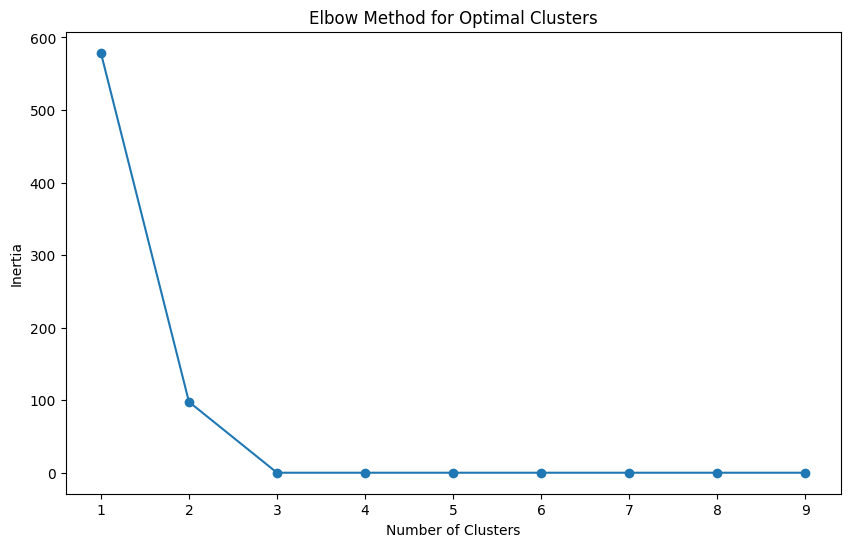


Final Results:
     Month Year  Cluster_Labels
0     May 2010               0
1     Jun 2010               1
2     Jul 2010               1
3     Aug 2010               1
4     Sep 2010               0
..         ...             ...
579   Jul 2023               1
580   Aug 2023               1
581   Sep 2023               1
582   Oct 2023               0
583   Nov 2023               2

[579 rows x 2 columns]


In [137]:
#CHOOSE METHOD
#I will use K-Means for assignment one

#Elbow method to find optimal number of clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=20)
    kmeans.fit(monthsNormalized)
    inertia.append(kmeans.inertia_)
    
#Plot using the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

#Optimal number of clusters based on elbow method
optimal_clusters = 3

#Apply K-means clustering with optimal clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=20)
kmeans.fit(monthsNormalized)

#Add cluster labels to the original DataFrame
CIMISDATA['Cluster_Labels'] = kmeans.labels_

#Display the final clustering results
print("\nFinal Results:\n", CIMISDATA[['Month Year', 'Cluster_Labels']])

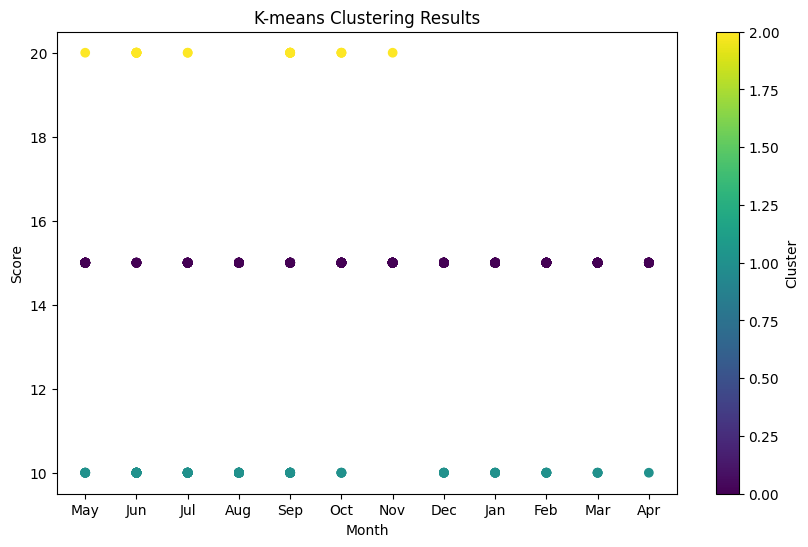

Top Months based on User Preferences:
583    Nov 2023
546    Oct 2020
469    Jun 2021
461    Oct 2020
457    Jun 2020
448    Sep 2019
436    Sep 2018
433    Jun 2018
421    Jun 2017
412    Sep 2016
409    Jun 2016
401    Oct 2015
Name: Month Year, dtype: object


In [138]:
#ANALYZE DATA

#Visualization of clustered data
plt.figure(figsize=(10, 6))
plt.scatter(CIMISDATA['Month'], CIMISDATA['Score'], c=CIMISDATA['Cluster_Labels'], cmap='viridis')
plt.xlabel('Month')
plt.ylabel('Score')
plt.title('K-means Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

#Print best months based on preference
print("Top Months based on User Preferences:")
print(top_months)

INTERPRET RESULTS AND REPORT FINDINGS
From the results we are able to see the best months to plan a vacation. The K-means clustering was good review for the first project and is good for showing the average of those months that are within range of our given preference. It varies as some years a particular month may be having outlier weather. However it is good for showing whihc months are going to have the best weather from the station we gathered. We can see there are less yellow dots symbolizing best weather therefore it is best to choose a month corresponding to these points for best chance at my prefernce of weather. Also I added a top months recommended based on preference and calculated them and based on the score we can see what months most fit our preference in the last decade and from this we can see June is good choice for choosing a vacation. I feel I have learned K-means very weel and also how to work with data given. I think this is gives me a very good foundation to pursue data mining and it was very fun class.